## Linear Regression Models

In [1]:
import matplotlib.pyplot as plt
#% matplotlib inline
import numpy as np
np.random.seed(42)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV

In [3]:
from sklearn.model_selection import cross_val_score

### 1. Linear Regression with Randomly Generated Data

- Generate random data for X and y and plot it
- Concatenate $x0=1$ to X, representing the bias term
- Find the best coefficient values using mathematical closed form solution
- Predict the y value for new data points of `[0]` and `[2]`
- Fit a prediction line to the previously generated random data set
- Find the coefficients and the prediction for the same new data points when using `scikitlearn`'s 

In [14]:
X = 2 * np.random.randn(100, 1)

randnoise = np.random.rand(100, 1)
y = 4 + 3*X + randnoise

# X = 2 * np.random.rand(100, 1)
# y = 4 + 3 * X + np.random.randn(100, 1)


Text(0, 0.5, 'y')

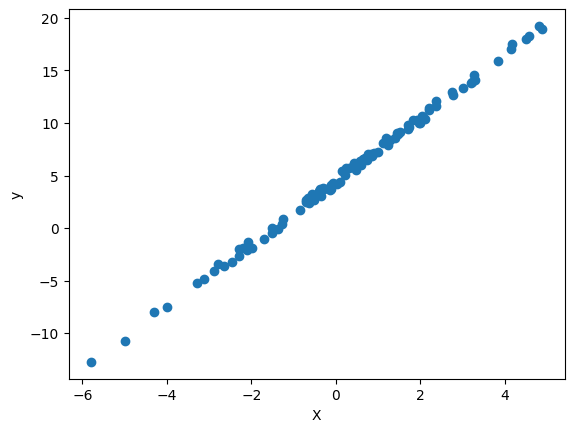

In [16]:
plt.scatter(X, y)

plt.xlabel('X')
plt.ylabel('y')

In [ ]:
y x 
y = w0 + w1*X

y = [w0 w1] [1 X]^T

In [17]:
X.shape

(100, 1)

In [20]:
[1, X[0][0]]

[1, -3.113163797319502]

In [28]:
# np.array([[1], [2], [3]])
# np.ones((100, 1))
np.concatenate((np.ones((3, 1)), np.array([[1], [2], [3]])), axis=1)

array([[1., 1.],
       [1., 2.],
       [1., 3.]])

In [30]:
XAll = np.concatenate((np.ones((100, 1)), X), axis=1)
XAll

array([[ 1.        , -3.1131638 ],
       [ 1.        , -0.85623032],
       [ 1.        ,  3.00151958],
       [ 1.        ,  1.70044348],
       [ 1.        , -0.69730427],
       [ 1.        , -0.69851541],
       [ 1.        , -0.6432701 ],
       [ 1.        ,  4.15349597],
       [ 1.        ,  0.7638709 ],
       [ 1.        ,  0.86008329],
       [ 1.        ,  2.06056691],
       [ 1.        ,  0.47757832],
       [ 1.        , -0.51808429],
       [ 1.        , -0.3926997 ],
       [ 1.        , -0.14320252],
       [ 1.        , -0.07444447],
       [ 1.        ,  1.45525909],
       [ 1.        ,  0.10389177],
       [ 1.        ,  1.46528015],
       [ 1.        , -0.16143316],
       [ 1.        ,  0.15727038],
       [ 1.        , -3.99640137],
       [ 1.        ,  1.83265535],
       [ 1.        ,  0.69297695],
       [ 1.        ,  1.99602022],
       [ 1.        , -5.79251076],
       [ 1.        ,  4.17674941],
       [ 1.        , -0.27917926],
       [ 1.        ,

In [33]:
# XAll.T.dot(XAll)

# w = (X X^T)^-1 . X . yi
# [w0, w1]
np.linalg.inv(XAll.T.dot(XAll)).dot(XAll.T).dot(y)

array([[4.48652537],
       [3.00451239]])

In [34]:
# Using sklearn
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [36]:
lr.coef_, lr.intercept_

(array([[3.00451239]]), array([4.48652537]))

In [ ]:
# X--> number of data points x number of features-->m x n
# X^T-->number of features x number of data points--> n x m

# X^T.X-->n x n

In [ ]:
# yhat = X.w
# X^T.y=X^T.X.w
# inv(X^T.X).X^T.y = inv(X^T.X).X^T.X.w
# inv(X^T.X).X^T.y=w

In [5]:
# X = 2 * np.random.randn(100,1)

# randnoise= np.random.randn(100,1)
# y = 4 + 3*X + randnoise

In [6]:
# XAll= np.c_[np.ones((100,1)), X, randnoise]

In [13]:
# np.array([[4],[3],[1]]).shape, XAll.shape

((3, 1), (100, 3))

In [14]:
# y2=np.dot(XAll, np.array([[4],[3],[1]]))

In [16]:
# sum(y2-y)

array([-1.65423231e-14])

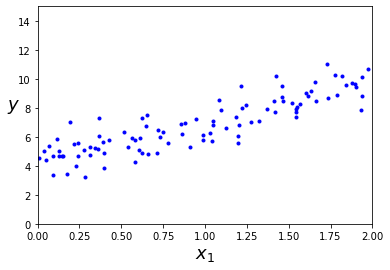

In [5]:
# plt.plot(X, y, "b.")
# plt.xlabel("$x_1$", fontsize=18)
# plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([0, 2, 0, 15])
# #save_fig("generated_data_plot")
# plt.show()

In [6]:
# X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
# theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
# X_b[:10]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516]])

In [8]:
# np.c_[np.array([1,2,3]), np.array([4,5,6])]


array([[1, 4],
       [2, 5],
       [3, 6]])

In [9]:
# X_b[1:3,]

array([[1.        , 1.90142861],
       [1.        , 1.46398788]])

In [10]:
# theta_best

array([[4.21509616],
       [2.77011339]])

In [11]:
# X_new = np.array([[0], [2]])
# X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
# y_predict = X_new_b.dot(theta_best)
# y_predict

array([[4.21509616],
       [9.75532293]])

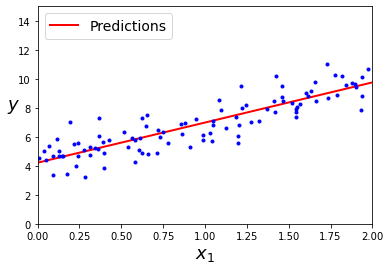

In [13]:
# plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
# plt.plot(X, y, "b.")
# plt.xlabel("$x_1$", fontsize=18)
# plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.legend(loc="upper left", fontsize=14)
# plt.axis([0, 2, 0, 15])
# #save_fig("linear_model_predictions")
# plt.show()

## 2. Polynomial Features

- Generate random data for X and y and plot it. this time, y will be a function of a polynomial.
- Transform the feature set using `PolynomialFeatures`
- Fit LinearRegression model to the transformed data
- Fit the data without transformation
- Plot the prediction lines for both polynomial regression and linear regression. Observe which one fits better to the dataset


In [37]:
Xp = -3 + 6*np.random.randn(200, 1)

In [38]:

# yp = w0 + w1*X + w2*X^2
yp = 2 + Xp + 0.4*Xp**2 + np.random.randn(200, 1)

In [ ]:
plt.scatter(Xp, yp)
plt.axes([-3, 3, 0, 10])

In [ ]:
# y = w0 + w1*X + w2*X^2
# y = [w0 w1 w2] * [1 X X^2].T

In [43]:
# # Assume - wrong
# # y = w0 + w1*X
lr2 = LinearRegression()
lr2.fit(Xp, yp)

print((lr2.intercept_, lr2.coef_))

(array([13.06237849]), array([[-1.15449896]]))


In [47]:
# y = w0 + w1*X + X^2
Xp2 = np.concatenate((Xp, Xp**2), axis=1)
# print(Xp2)

Xp.shape, Xp2.shape

((200, 1), (200, 2))

In [48]:
lr3 = LinearRegression()
lr3.fit(Xp2, yp)

print((lr3.intercept_, lr3.coef_))

(array([2.04172951]), array([[0.99624911, 0.40048323]]))


In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
poly = PolynomialFeatures(degree=2, include_bias=False) # include_bias == w0

In [62]:
poly.fit(Xp)

PolynomialFeatures(include_bias=False)

In [63]:
poly.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [64]:
Xp3 = poly.transform(Xp)
Xp3.shape

(200, 2)

In [67]:
from sklearn.pipeline import Pipeline

In [77]:
pipe1 = Pipeline(steps=[('poly', PolynomialFeatures(degree=2, include_bias=False)),
                ('lr4', LinearRegression())])
pipe1

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lr4', LinearRegression())])

In [78]:
pipe1.fit(Xp, yp)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lr4', LinearRegression())])

In [79]:
(pipe1[1].intercept_, pipe1[1].coef_)

(array([2.04172951]), array([[0.99624911, 0.40048323]]))

In [20]:
# n = 200
# Xrp = 6 * np.random.rand(n, 1)-3
# yrp = 0.4 * Xrp**2 + Xrp + 2 + np.random.randn(n, 1)

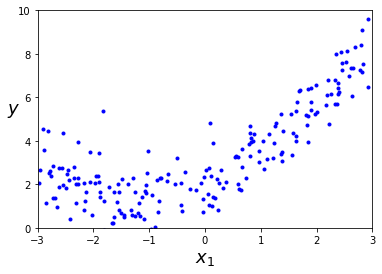

In [22]:
# plt.plot(Xrp, yrp, "b.")
# plt.xlabel("$x_1$", fontsize=18)
# plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([-3, 3, 0, 10])
# #plt.savefig("Fig/quadratic_data_plot.png")
# plt.show()

In [23]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(Xrp)
# print(Xrp[0])
# print(X_poly[0])

[1.39196365]
[1.39196365 1.93756281]


In [24]:
# lr_poly = LinearRegression()
# lr_poly.fit(X_poly, yrp)
# lr_poly.intercept_, lr_poly.coef_

(array([2.0042704]), array([[0.98923049, 0.42168426]]))

In [25]:
# lr = LinearRegression()
# lr.fit(Xrp, yrp)
# lr.intercept_, lr.coef_

(array([3.31596688]), array([[0.95629576]]))

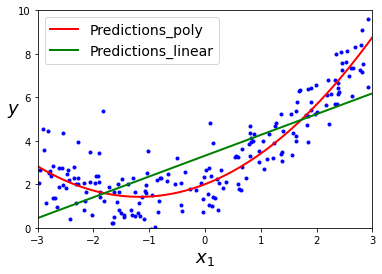

In [26]:
# X_new=np.linspace(-3, 3, 200).reshape(200, 1)
# X_new_poly = poly.transform(X_new)
# y_new_poly = lr_poly.predict(X_new_poly)
# y_new=lr.predict(X_new)
# plt.plot(Xrp, yrp, "b.")
# plt.plot(X_new, y_new_poly, "r-", linewidth=2, label="Predictions_poly")
# plt.plot(X_new, y_new, "g-", linewidth=2, label="Predictions_linear")
# plt.xlabel("$x_1$", fontsize=18)
# plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
# #plt.savefig("Fig/quadratic_predictions_plot")
# plt.show()

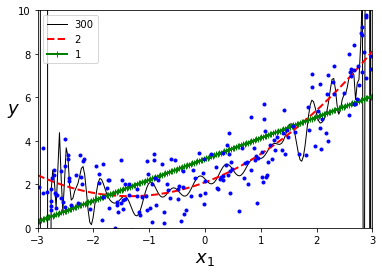

In [25]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# for style, width, degree in (("k-", 1, 300), ("r--", 2, 2), ("g-+", 2, 1)):
#     poly = PolynomialFeatures(degree=degree, include_bias=False)
#     scaler = StandardScaler()
#     lr = LinearRegression()
#     polynomial_regression = Pipeline([
#             ("poly", poly),
#             ("scaler", scaler),
#             ("lr", lr),
#         ])
#     polynomial_regression.fit(Xrp, yrp)
#     y_newbig = polynomial_regression.predict(X_new)
#     plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

# plt.plot(Xrp, yrp, "b.", linewidth=3)
# plt.legend(loc="upper left")
# plt.xlabel("$x_1$", fontsize=18)
# plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.axis([-3, 3, 0, 10])
# plt.savefig("Fig/high_degree_polynomials_plot")
# plt.show()

## 3. Boston Housing Data with Polynomials

- Transform the Boston House dataset and split the dataset into test and train datasets
- Run cross validation
- Plot the coefficients of the model

In [26]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, scale
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X, y = boston.data, boston.target
#X, y = data.data, data.target

X_poly = PolynomialFeatures(include_bias=False).fit_transform(SimpleImputer().fit_transform(scale(X)))
print(X_poly.shape)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


In [27]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler, scale
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

trans=Pipeline([
            ("poly", PolynomialFeatures(include_bias=False)),
            ("imputer", SimpleImputer()),
            ("scale", StandardScaler())
        ])
boston = load_boston()
X, y = boston.data, boston.target
#X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_poly_train = trans.fit_transform(X_train)
X_poly_test = trans.transform(X_test)
print(X_poly_train.shape)


(379, 104)


In [28]:
np.mean(cross_val_score(LinearRegression(), X_poly_train, y_train, cv=10))

0.8065194743873978

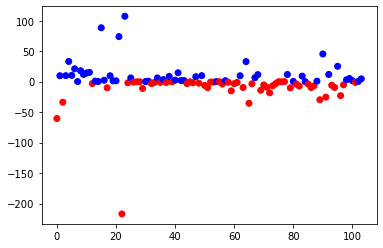

In [29]:
lr = LinearRegression().fit(X_poly_train, y_train)
plt.scatter(range(X_poly_train.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")
#plt.savefig("Fig/lr_coefficients_large.png")